In [1]:
import gym
from time import sleep
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import importlib
import optical_network_game.game_gym
importlib.reload(optical_network_game.game_gym)
from optical_network_game.game_gym import *
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq:
    :param log_dir: Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: Verbosity level.
    """
    def __init__(self, check_freq: int, log_dir: str, verbose: int = 1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print(f"Num timesteps: {self.num_timesteps}")
                print(f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}")

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print(f"Saving new best model to {self.save_path}")
                  self.model.save(self.save_path)

        return True

In [3]:
import os
# Create log dir
log_dir = os.path.join(os.getcwd(), "tmp/")
os.makedirs(log_dir, exist_ok=True)

In [4]:
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=10000, log_dir=log_dir)

# create model

nodeList, linkList = createTestTopology()
requestList = generateRequests(nodeList, 30)

user = User()
env = game_gym(nodeList, linkList, requestList, user)
eveon = Monitor(env, log_dir)

# check_env(eveon, warn=True)
model = DQN('MlpPolicy', eveon, verbose=1, buffer_size=10000, device='cuda', 
learning_starts=10000, exploration_fraction=0.9, learning_rate=0.000025)



Using cuda device
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [5]:
# train
model.learn(total_timesteps=500000, callback=callback)
model.save("DQNEveon12")

(256, 256, 3)
Total reward for this episode is 0.5700000000000001
(256, 256, 3)
Total reward for this episode is 1.8050000000000002
(256, 256, 3)
Num timesteps: 10000
Best mean reward: -inf - Last mean reward per episode: 1.19
Saving new best model to c:\Users\tkate\Desktop\Year 4\project\Game part\4th-Year-Project\tmp/best_model
Total reward for this episode is 4.639999999999999
(256, 256, 3)
Total reward for this episode is 0.77
(256, 256, 3)
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.23e+03 |
|    ep_rew_mean      | 1.95     |
|    exploration_rate | 0.973    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 106      |
|    time_elapsed     | 121      |
|    total_timesteps  | 12914    |
| train/              |          |
|    learning_rate    | 2.5e-05  |
|    loss             | 0.000137 |
|    n_updates        | 728      |
----------------------------------
Total reward for this epis

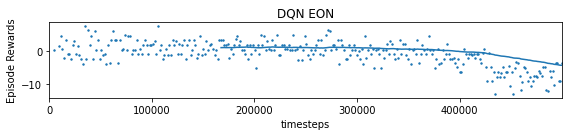

In [6]:
# Plot rewards
plot_results([log_dir], 2000000, results_plotter.X_TIMESTEPS, "DQN EON")
plt.show()

In [11]:
# test
final_model = 'DQNEveon12'
best_model = 'tmp/best_model.zip'
model = DQN.load(final_model, env=env, device='cpu')

obs = env.reset()
while True :
    # clear_output(wait=True)
    action, states_ = model.predict(obs, deterministic=True)
    # action = 6
    obs, rewards, dones, info = env.step(action)
    # plt.imshow(obs)
    # plt.show()
    print(action)
    if dones == True:
        print(env.reward)

        # with open('info.json', 'w') as outfile:
        #     json.dump(info, outfile)

        env.reset()

    env.render()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
(256, 256, 3)
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


SystemExit: 